In [140]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [148]:
data = pd.read_csv("FinalHumanEvalvsAgent.csv") 
data = pd.read_csv("finalHumanEval.csv") 
data.loc[(data.agent == 'agent_drl_honest'),'agent']='Truthful'
data.loc[(data.agent == 'Indifferent'),'agent']='Indiff'
data.loc[(data.agent == 'agent_drl_mid'),'agent']='Indiff'
data.loc[(data.agent == 'agent_drl_mid_optimised'),'agent']='Indiff-pruned'
data.loc[(data.agent == 'Policy Based'),'agent']='Policy'
data.loc[(data.agent == 'agent_drl_policy'),'agent']='Policy'
data.loc[(data.agent == 'agent_drl_org'),'agent']='Ambiguity'
data.loc[(data.agent == 'agent_ds4'),'agent']='πd4'

In [149]:
data.head(10)

,map,agent,human id,start,density,steps,goal0,probability,goal1,probability.1,goal2,probability.2,goal3
0,arena2,Indiff,1,"(20, 41)",10,5,"(40, 5)",0.33,"(8, 5)",0.33,"(32, 10)",0.33,0.99
1,arena2,Indiff,1,"(20, 41)",30,14,"(40, 5)",0.35,"(8, 5)",0.05,"(32, 10)",0.60,1.00
2,arena2,Indiff,1,"(20, 41)",50,24,"(40, 5)",0.30,"(8, 5)",0.10,"(32, 10)",0.60,1.00
3,arena2,Indiff,1,"(20, 41)",70,34,"(40, 5)",0.35,"(8, 5)",0.30,"(32, 10)",0.35,1.00
4,arena2,Indiff,1,"(20, 41)",90,44,"(40, 5)",0.80,"(8, 5)",0.00,"(32, 10)",0.20,1.00
5,arena2,Indiff,1,"(20, 41)",100,48,"(40, 5)",1.00,"(8, 5)",0.00,"(32, 10)",0.00,1.00
6,arena2,Policy,1,"(20, 41)",10,4,"(40, 5)",0.40,"(8, 5)",0.20,"(32, 10)",0.40,1.00
7,arena2,Policy,1,"(20, 41)",30,11,"(40, 5)",0.45,"(8, 5)",0.10,"(32, 10)",0.45,1.00
8,arena2,Policy,1,"(20, 41)",50,19,"(40, 5)",0.47,"(8, 5)",0.06,"(32, 10)",0.47,1.00
9,arena2,Policy,1,"(20, 41)",70,26,"(40, 5)",0.15,"(8, 5)",0.05,"(32, 10)",0.80,1.00


In [151]:
avgdata = data[data['human id']!='GR'].groupby(['agent', 'density'], as_index=False).mean()
avgdata = avgdata[avgdata['density']!=100] #exclude 
#avgdata = avgdata[avgdata['human id']!='GR'] #exclude 

/Users/ghawady/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [152]:
avgdata.head(10)

,agent,density,human id,steps,probability,probability.1,probability.2,goal3
0,Indiff,10,13.000000,5.000000,0.428000,0.368000,0.202000,0.998000
1,Indiff,30,13.000000,14.000000,0.312600,0.412000,0.275400,1.000000
2,Indiff,50,13.000000,24.000000,0.207600,0.491200,0.301200,1.000000
3,Indiff,70,13.000000,34.000000,0.393600,0.314400,0.292000,1.000000
4,Indiff,90,13.000000,44.000000,0.792400,0.107800,0.099800,1.000000
6,Policy,10,12.958333,4.166667,0.364025,0.306108,0.329858,0.999996
7,Policy,30,12.958333,11.500000,0.400554,0.322221,0.277221,1.000000
8,Policy,50,12.958333,19.833333,0.353750,0.337917,0.308333,1.000000
9,Policy,70,12.958333,27.333333,0.234583,0.435417,0.330000,1.000000
10,Policy,90,12.958333,34.833333,0.842500,0.099583,0.057917,1.000000


In [153]:
plotdata = avgdata[['agent', 'density', 'probability']]

In [154]:
np.asarray(plotdata[plotdata['agent']=='Indifferent']['probability'])

array([], dtype=float64)

In [155]:
plot2data = data[data['human id']=='GR']
plot2data = plot2data[plot2data['density']!=100] #exclude 
plot2data.head(10)
#plotdata[plotdata['agent']==agent]['probability']
#plotdata.head(10)

/Users/ghawady/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,map,agent,human id,start,density,steps,goal0,probability,goal1,probability.1,goal2,probability.2,goal3


Indiff


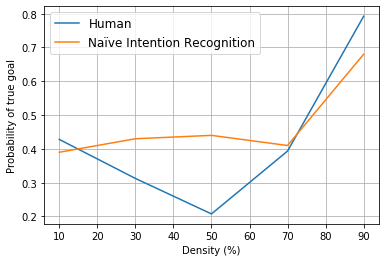

In [139]:
x = [10,30,50,70,90] #np.arange(10, 100, 20)

#print(x)
agent='Indiff'
print(agent)
#if agent in ["agent_drl_mid_optimized","Indiff","Indiff-pruned"]:
y1 = np.asarray(plotdata[plotdata['agent']==agent]['probability'])
y2 = np.asarray(plot2data[plot2data['agent']==agent]['probability'])
plt.plot(x, y1, label='Human')
plt.plot(x, y2, label='Naïve Intention Recognition')
    
plt.legend(loc=2, prop={'size': 12})
plt.xlabel('Density (%)')
plt.ylabel('Probability of true goal')
#plt.locator_params(axis='x', nbins=5)
#plt.title('Human Vs Goal Recognition - '+agent)
plt.grid(True)
plt.savefig('HumanVsGR_prob_per_density_'+agent+'_model.jpg')
plt.show()

Indiff
Policy
Truthful


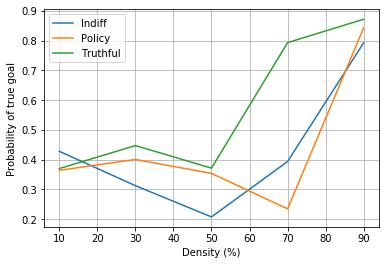

In [156]:
x = [10,30,50,70,90] #np.arange(10, 100, 20)

#print(x)
for agent in plotdata['agent'].unique():
    print(agent)
    #if agent in ["agent_drl_mid_optimized","Indiff","Indiff-pruned"]:
    y = np.asarray(plotdata[plotdata['agent']==agent]['probability'])
    plt.plot(x, y, label=agent)
    
plt.legend()
plt.xlabel('Density (%)')
plt.ylabel('Probability of true goal')
#plt.locator_params(axis='x', nbins=5)

plt.grid(True)
plt.savefig('human_prob_per_density.jpg')
plt.show()